In [23]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
gcts = pd.read_csv ("/Users/eilonzohar/Documents/Code/01_Data/commodity_trade_statistics_data.csv")

/var/folders/tk/x_9q45v57_7cf8kzlygh1sfw0000gp/T/ipykernel_39536/420060893.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  gcts = pd.read_csv ("/Users/eilonzohar/Documents/Code/01_Data/commodity_trade_statistics_data.csv")


## Who are the countries that import the most playing cards?

Note: There is some missing data. We have data from 2000 on some of the countries and data from later on others

In [20]:
imported_playing_cards_statistics = gcts [(gcts ["quantity_name"] == 'Number of packages') & (gcts ["flow"] == "Import")]

In [21]:
keys, total_imported = [], []
for key, val in imported_playing_cards_statistics.groupby (by= "country_or_area"):
    keys.append (key)
    total_imported.append (val ["quantity"].sum ())

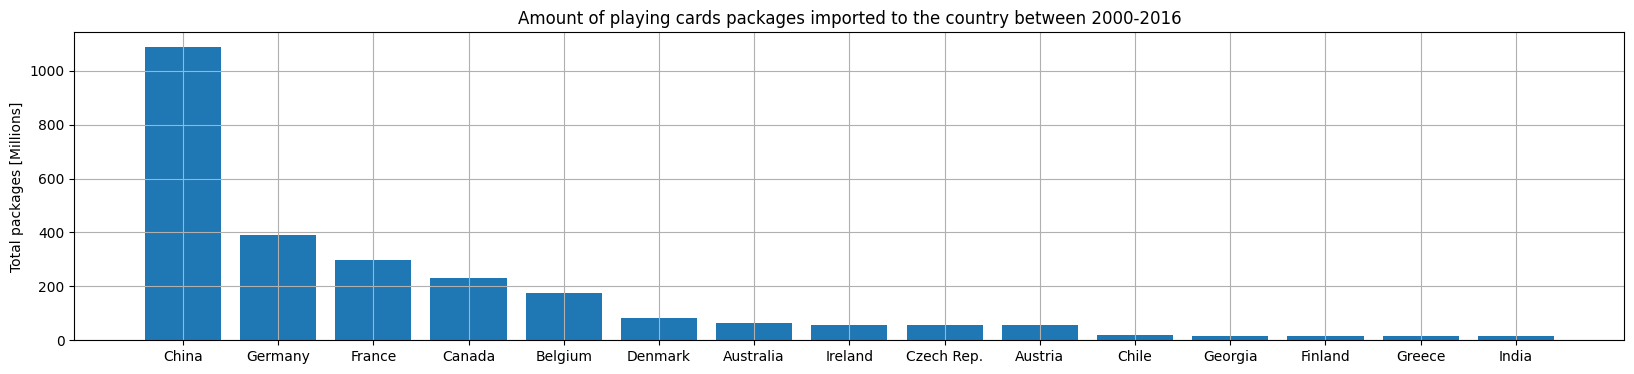

In [72]:
# Total
fig, ax = plt.subplots (figsize= (20, 4))
imported_playing_cards_per_country = pd.DataFrame ({"country": keys, "total imported 2000-2016": total_imported})


# Sum all 3 chinas and drop them
contains_china = ["China" in k for k in imported_playing_cards_per_country ["country"]]
doesnt_contain_china = [not k for k in contains_china]
china_value = imported_playing_cards_per_country [contains_china] ["total imported 2000-2016"].sum()
imported_playing_cards_per_country =  imported_playing_cards_per_country [doesnt_contain_china]
imported_playing_cards_per_country.loc [len (imported_playing_cards_per_country)] = ["China", china_value]

# Drop EU-28
eu_28_idx = imported_playing_cards_per_country [imported_playing_cards_per_country ["country"] == "EU-28"].index
imported_playing_cards_per_country = imported_playing_cards_per_country.drop (eu_28_idx)




imported_playing_cards_per_country = imported_playing_cards_per_country.sort_values (by= "total imported 2000-2016", ascending= False).head (15)
ax.bar (imported_playing_cards_per_country.country, imported_playing_cards_per_country ["total imported 2000-2016"]);
def millions (x, pos):
    return '{:1.0f}'.format (x*1e-6)
ax.yaxis.set_major_formatter (millions);
ax.set_title ("Amount of playing cards packages imported to the country between 2000-2016")
ax.set_ylabel ("Total packages [Millions]")
ax.grid();


In [76]:
# Trend
country, year, total_imported = [], [], []
for key, val in imported_playing_cards_statistics.groupby (["country_or_area", "year"]):
    country.append (key [0])
    year.append (key [1])
    total_imported.append (val ["quantity"].sum())

imported_playing_cards_per_country_per_year = pd.DataFrame ({"country": country, "year": year, "total_imported": total_imported})

In [92]:
imported_playing_cards_per_country_per_year [imported_playing_cards_per_country_per_year ["year"] > 2014]

,country,year,total_imported
7,Albania,2015,142698.0
8,Albania,2016,87500.0
18,Algeria,2015,382641.0
19,Algeria,2016,524823.0
35,Angola,2015,199912.0
...,...,...,...
689,India,2016,2021873.0
697,Indonesia,2015,1573475.0
698,Indonesia,2016,2468031.0
709,Ireland,2015,5775876.0


In [94]:
country

'Iran'

In [95]:
countries_where_we_have_this_data = []
for country in imported_playing_cards_per_country_per_year["country"].unique():
    if len (imported_playing_cards_per_country_per_year [(imported_playing_cards_per_country_per_year ["country"] == country) & \
                                                         (imported_playing_cards_per_country_per_year ["year"] > 2014)]) == 2:
        countries_where_we_have_this_data.append (country)

ratio_2016_2015 = []

for country in countries_where_we_have_this_data:
    ratio_2016_2015.append (imported_playing_cards_per_country_per_year [(imported_playing_cards_per_country_per_year ["country"] == country)\
                                                & (imported_playing_cards_per_country_per_year ["year"] == 2016)] ['total_imported'].values[0]/\
    imported_playing_cards_per_country_per_year [(imported_playing_cards_per_country_per_year ["country"] == country)\
                                                & (imported_playing_cards_per_country_per_year ["year"] == 2015)] ['total_imported'].values[0]
)

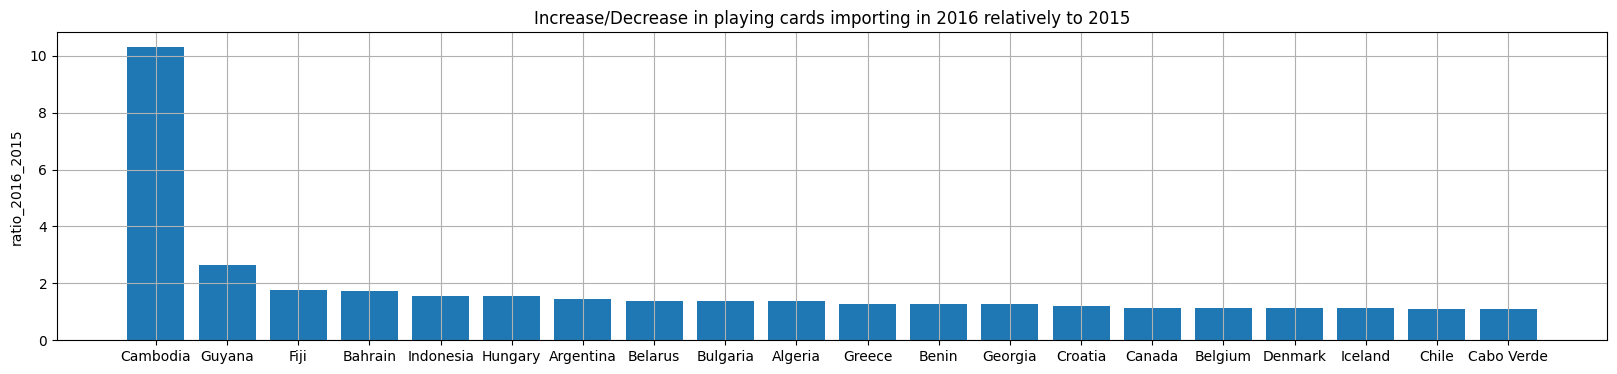

In [100]:
# Plot
df_for_plot = pd.DataFrame ({"Country": countries_where_we_have_this_data, "Ratio": ratio_2016_2015}).sort_values (by= "Ratio", ascending= False).head (20)
fig, ax = plt.subplots (figsize= (20, 4))
ax.bar (df_for_plot ["Country"], df_for_plot ["Ratio"]);
ax.set_title ("Increase/Decrease in playing cards importing in 2016 relatively to 2015")
ax.set_ylabel ("ratio_2016_2015")
ax.grid();
